<a href="https://colab.research.google.com/github/thakurhrutika/NNDL-LAB/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PRACTICAL 3**

**Aim :** To implement RNN/LSTM

**Theory**

**Recurrent Neural Networks RNNs**


👉 RNNs have feedback loops in the recurrent layer. This lets them maintain information in ‘memory’ over time. But, it can be difficult to train standard RNNs to solve problems that require learning long-term temporal dependencies.

👉 This is because the gradient of the loss function decays exponentially with time (called the vanishing gradient problem).

**Long Short-Term Memory LSTM**

👉 LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a ‘memory cell’ that can maintain information in memory for long periods of time. This memory cell lets them learn longer-term dependencies.

👉 LSTMs deal with vanishing and exploding gradient problem by introducing new gates, such as input and forget gates, which allow for a better control over the gradient flow and enable better preservation of “long-range dependencies”.

**Implementation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/monthly-milk-production.csv',index_col='Month',parse_dates=True)   #Date is not  string
df.index.freq='MS'       #monthly

In [ ]:
df.head()     #month wise production data will be displayed

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


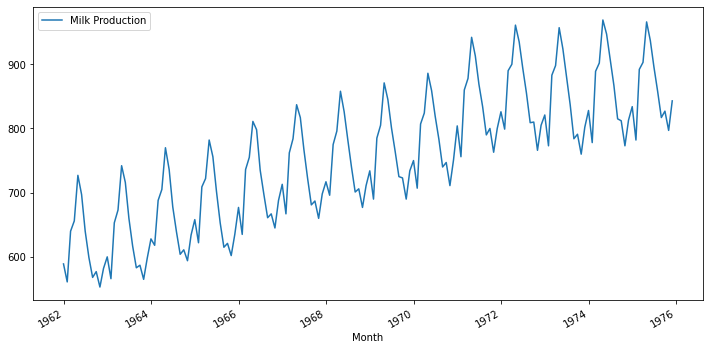

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


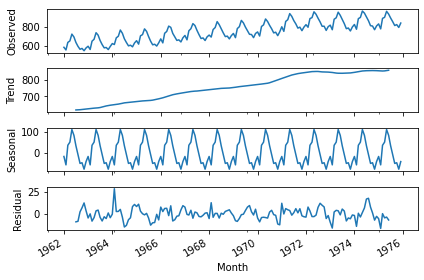

In [ ]:
results = seasonal_decompose(df['Milk Production'])
results.plot();

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]        # all data except the last 12 months data 168-12=156
test = df.iloc[156:]         # Last 12 months data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()       #magnitude of the production values not in proper range

(                     Milk Production
 Month                               
 1962-01-01 01:00:00            589.0
 1962-02-01 01:00:00            561.0
 1962-03-01 01:00:00            640.0
 1962-04-01 01:00:00            656.0
 1962-05-01 01:00:00            727.0,                      Milk Production
 Month                               
 1975-08-01 01:00:00            858.0
 1975-09-01 01:00:00            817.0
 1975-10-01 01:00:00            827.0
 1975-11-01 01:00:00            797.0
 1975-12-01 01:00:00            843.0)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]    # transform method covert the values in the 0...1.

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

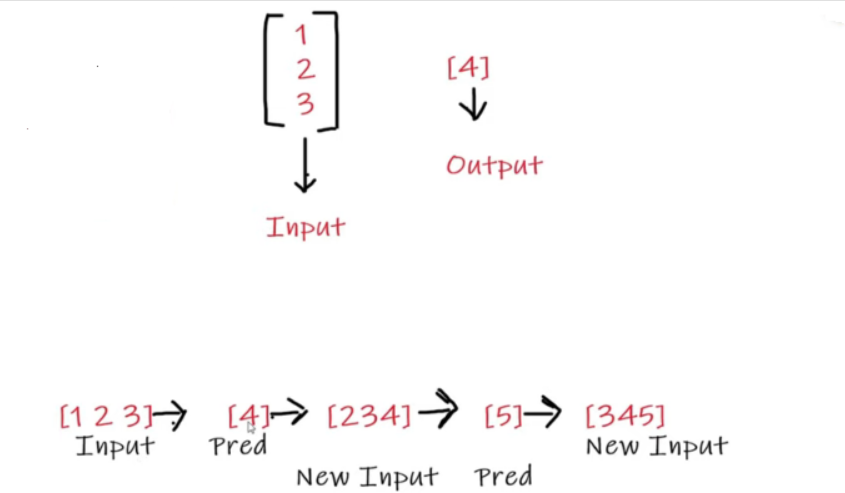

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape        # 1 row 3 columns and 1 feature

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)  #generator creates batches of 3-3 inputs and using that predict the next value

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.0433
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0235
Epoch 3/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0219
Epoch 4/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0144
Epoch 5/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0118
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0101
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0047
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 13/50
144/144 [====

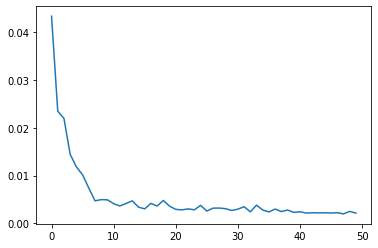

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:] #taking last 12 months values in training set to make prediction for 1st value in test set
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.6558875]], dtype=float32)

In [ ]:
scaled_test[0]      # original value was 0.67 model predicted it to be 0.65

array([0.67548077])

In [ ]:
test_predictions = []     #empty list of test predictions

first_eval_batch = scaled_train[-n_input:]      #last 12 values from the training set
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6558875], dtype=float32),
 array([0.63031685], dtype=float32),
 array([0.8078681], dtype=float32),
 array([0.8762059], dtype=float32),
 array([0.9871435], dtype=float32),
 array([0.97074103], dtype=float32),
 array([0.9021852], dtype=float32),
 array([0.8054625], dtype=float32),
 array([0.69662595], dtype=float32),
 array([0.65633214], dtype=float32),
 array([0.6009313], dtype=float32),
 array([0.64504933], dtype=float32)]

In [ ]:
test.head()

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


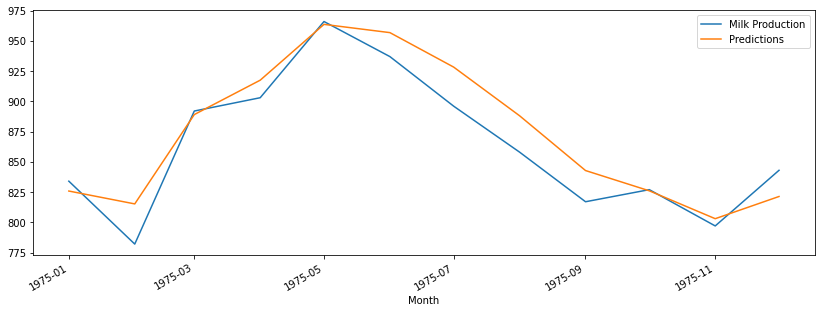

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Milk Production'],test['Predictions']))
print(rmse)

20.22084632863167


**Conclusion**:
Hence we have successfullly implemmented rnn/lstm for dataset of milk production.